In [34]:
import numpy as np 
import pickle as pkl
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPool2D

from sklearn.neighbors import NearestNeighbors
import os
from numpy.linalg import norm

In [61]:
filenames = []
for file in os.listdir('images'):
    filenames.append(os.path.join('images', file))
    

In [62]:
len(filenames)

43226

In [63]:
#importing resnet50 and configuration

model = ResNet50(weights = 'imagenet', include_top= False, input_shape = (224,224,3))

model.trainable = False
model = tf.keras.models.Sequential([model, GlobalMaxPool2D()])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d_2          │ (None, 2048)           │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
# Extracting features from image

# img  = image.load_img(image_path, target_size=(224,224))
# img_array = image.img_to_array(img)
# img_expand_dim = np.expand_dims(img_array , axis=0)
# img_preprocess = preprocess_input(img_expand_dim)
# result = model.predict(img_preprocess).flatten()
# norm_result = result/norm(result)
# norm_result

NameError: name 'image_path' is not defined

In [76]:
def extract_features_from_images(image_path,model):
    img  = image.load_img( image_path, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_expand_dim = np.expand_dims(img_array , axis=0)
    img_preprocess = preprocess_input(img_expand_dim)
    result = model.predict(img_preprocess).flatten()
    norm_result = result/norm(result)
    return norm_result

In [66]:
extract_features_from_images(filenames[0],model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


array([0.        , 0.01761617, 0.00171604, ..., 0.01247241, 0.02726403,
       0.06899223], shape=(2048,), dtype=float32)

In [41]:
image_features = []
for file in filenames:
    image_features.append(extract_features_from_images(file,model))
    
image_features

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

[array([0.00618142, 0.04227234, 0.        , ..., 0.0070145 , 0.01688976,
        0.0324885 ], shape=(2048,), dtype=float32),
 array([0.00618142, 0.04227234, 0.        , ..., 0.0070145 , 0.01688976,
        0.0324885 ], shape=(2048,), dtype=float32),
 array([0.00618142, 0.04227234, 0.        , ..., 0.0070145 , 0.01688976,
        0.0324885 ], shape=(2048,), dtype=float32),
 array([0.00618142, 0.04227234, 0.        , ..., 0.0070145 , 0.01688976,
        0.0324885 ], shape=(2048,), dtype=float32),
 array([0.00618142, 0.04227234, 0.        , ..., 0.0070145 , 0.01688976,
        0.0324885 ], shape=(2048,), dtype=float32),
 array([0.00618142, 0.04227234, 0.        , ..., 0.0070145 , 0.01688976,
        0.0324885 ], shape=(2048,), dtype=float32),
 array([0.00618142, 0.04227234, 0.        , ..., 0.0070145 , 0.01688976,
        0.0324885 ], shape=(2048,), dtype=float32),
 array([0.00618142, 0.04227234, 0.        , ..., 0.0070145 , 0.01688976,
        0.0324885 ], shape=(2048,), dtype=float32),


In [67]:
pkl.dump(image_features, open('Images_features.pkl', 'wb'))
pkl.dump(filenames,open('filesnames.pkl','wb'))

In [77]:
#Loading pickle files 

Images_features = pkl.load(open('Images_features.pkl', 'rb'))
filenames = pkl.load(open('filesnames.pkl', 'rb'))


In [78]:
np.array(Images_features).shape

(43226, 2048)

In [79]:
#convert to numpy array
image_features = np.array(image_features)

In [ ]:
#finding similar images

neighbors = NearestNeighbors(n_neighbors = 6 ,algorithm = 'brute', metric = 'cosine')


In [81]:
neighbors.fit(image_features)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=6)

In [82]:
input_image = extract_features_from_images('1534.jpg',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


In [83]:
distance,indices = neighbors.kneighbors([input_image])

In [86]:
indices[0]

array([0, 3, 4, 5, 2, 1])

In [87]:
from IPython.display import Image

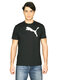

In [88]:
Image('1534.jpg')

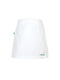

In [89]:
Image(filenames[indices[0][0]])

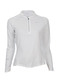

In [90]:
Image(filenames[indices[0][1]])

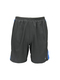

In [91]:
Image(filenames[indices[0][2]])

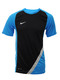

In [92]:
Image(filenames[indices[0][3]])